In [77]:
import numpy as np
from scipy.linalg import sqrtm
import matplotlib.pyplot as plt

In [2]:
N = 1000

In [42]:
s_gauss = np.random.randn(N)*2 + 3

In [43]:
s_uniform = np.random.rand(N) * 3 - 2

In [45]:
S = np.array([s_gauss, s_uniform])

In [47]:
M = np.array([[1,3],[5,1]])

In [48]:
X = np.dot(M, S)

In [49]:
X.shape

(2, 1000)

In [37]:
def plot(x1, line=None):
    x = x1[0]
    y = x1[1]
    plt.plot(x, y, 'ro', ms=3, label='class1')

    if not (line is None):
            plt.plot(line[0], line[1], 'k-', ms=5)
            
    #plt.xlim(np.min(x)-1, np.max(x)+1)
    #plt.ylim(np.min(y)-1, np.max(y)+1)
    
    plt.show()

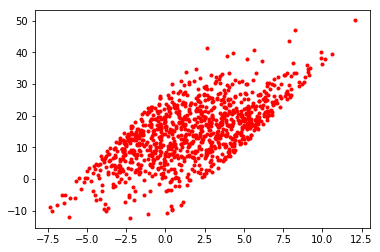

In [50]:
plot(X)

In [78]:
def centering_sphering(X):
    '''
    X: d x n matrix
    '''
    n = X.shape[1]
    H = np.eye(n) - np.ones((n,n))/n
    XH = np.dot(X, H)
    temp = sqrtm(np.linalg.inv(np.dot(XH, XH.T)/n))
    X_tilde = np.dot(temp, XH)
    return X_tilde

In [79]:
X_tilde = centering_sphering(X)

In [80]:
X_tilde.shape

(2, 1000)

In [81]:
np.mean(X_tilde[0])

3.9079850466805508e-17

In [84]:
np.std(X_tilde[0])

1.0000000000000002

In [63]:
A = np.array([[3,1], [1,3]])

In [65]:
_, lamb = np.linalg.eig(A)

In [66]:
lamb

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [67]:
np.dot(A, lamb)

array([[ 2.82842712, -1.41421356],
       [ 2.82842712,  1.41421356]])

In [85]:
1e-08

1e-08

In [86]:
np.inf

inf

In [109]:
def approx_newton(X, Nlim=50):
    '''
    X should be normalized.
    X: d x n matrix
    '''
    n = X.shape[1]
    b = np.array([1,0])
    threshold = 1e-08
    diff = np.inf
    n_loop = 1
    
    while n_loop < Nlim:
        #print(b)
        b_prev = b
        sum = 0
        for i in range(n):
            sum += X[:, i] * (np.dot(b, X[:, i]) ** 3)
        b = 3 * b - sum/n
        b = b / np.linalg.norm(b)
        diff = np.linalg.norm(b - b_prev)
        if (diff < threshold):
            break
        else:
            n_loop += 1
    
    if n_loop == Nlim:
        print('may not be converged')
    
    return b

In [105]:
approx_newton(X_tilde)

[1 0]
[ 0.99206035 -0.12576269]
[ 0.99465987 -0.10320727]
[ 0.99422366 -0.10732807]
[ 0.99430417 -0.10657966]
[ 0.99428957 -0.10671572]
[ 0.99429223 -0.10669099]
[ 0.99429174 -0.10669549]
[ 0.99429183 -0.10669467]
[ 0.99429182 -0.10669482]
[ 0.99429182 -0.10669479]


array([ 0.99429182, -0.1066948 ])

In [110]:
b = approx_newton(X_tilde)

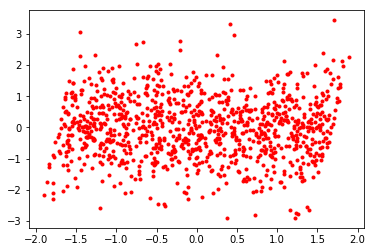

In [111]:
plot(X_tilde)

In [116]:
def line(b, X):
    x_min = np.min(X[0])
    x_max = np.max(X[1])
    x = np.linspace(x_min, x_max, 1000)
    return [x, (b[1]/b[0])*x]

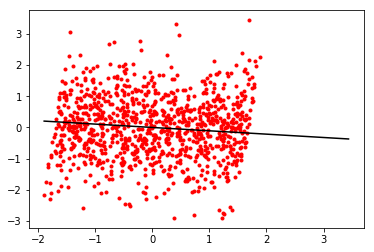

In [117]:
plot(X_tilde, line(b, X_tilde))

# Summary

In [ ]:
import numpy as np
from scipy.linalg import sqrtm
import matplotlib.pyplot as plt

N = 1000